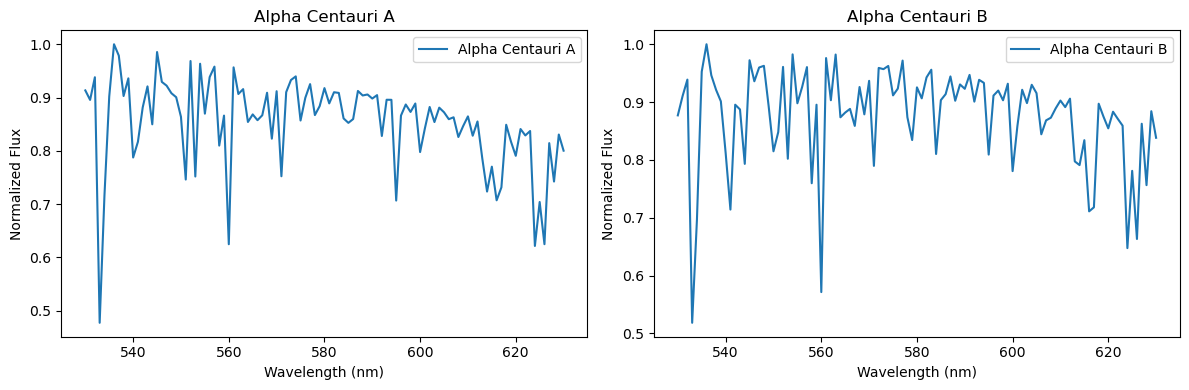


Photon Counts for Different Exposure Times:
Exposure Time: 1 seconds -> Photon Count: 6.69e+03 photons
Exposure Time: 100 seconds -> Photon Count: 6.69e+05 photons
Exposure Time: 1000 seconds -> Photon Count: 6.69e+06 photons
Exposure Time: 10000 seconds -> Photon Count: 6.69e+07 photons


In [3]:
import jax
import jax.numpy as np
import matplotlib.pyplot as plt
import pysynphot as S
from astropy import units as u

# Constants
h = 6.626e-34  # Planck's constant, J*s
c = 3.0e8      # Speed of light, m/s

# Stellar properties for Alpha Centauri A and B
ALPHA_CEN_A = {"temp": 5770.0, "metal": 0.2, "grav": 4.0}
ALPHA_CEN_B = {"temp": 5350.0, "metal": 0.23, "grav": 4.37}

def get_normalized_spectrum(star_props, wavelengths):
    """Retrieve and normalize spectrum for a star."""
    spectrum = S.Icat("phoenix", star_props["temp"], star_props["metal"], star_props["grav"])
    spectrum.convert('flam')  # Convert to flux per unit area
    spectrum.convert('m')     # Convert to flux per unit wavelength
    sampled_spectrum = spectrum.sample(wavelengths)
    return sampled_spectrum / sampled_spectrum.max()

# Define main wavelength grid for detailed spectrum (530-630 nm)
spec_wavelengths = np.linspace(530e-9, 630e-9, 101)

# Generate spectra for Alpha Centauri A and B
Aspec = get_normalized_spectrum(ALPHA_CEN_A, spec_wavelengths)
Bspec = get_normalized_spectrum(ALPHA_CEN_B, spec_wavelengths)

# Plot Alpha Centauri A and B spectra
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Alpha Centauri A")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Flux")
plt.plot(spec_wavelengths * 1e9, Aspec, label="Alpha Centauri A")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Alpha Centauri B")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Flux")
plt.plot(spec_wavelengths * 1e9, Bspec, label="Alpha Centauri B")
plt.legend()

plt.tight_layout()
plt.show()

# Convert to photon flux (photons/cm²/s/Å) using Planck's relation
def flux_to_photon_flux(flux, wavelengths):
    """Convert flux to photon flux (photons/cm²/s/Å)."""
    return flux * wavelengths * 1e-10 / (h * c)

# Convert spectra to photon flux
A_photon_flux = flux_to_photon_flux(Aspec, spec_wavelengths)
B_photon_flux = flux_to_photon_flux(Bspec, spec_wavelengths)

# Calculate total photon flux (photons/cm²/s) by integrating the spectra
total_photon_flux_A = np.trapezoid(A_photon_flux, spec_wavelengths)
total_photon_flux_B = np.trapezoid(B_photon_flux, spec_wavelengths)

# Total photon flux from both stars
total_photon_flux = total_photon_flux_A + total_photon_flux_B

# TOLIMAN Telescope Aperture Area Calculation
D_primary = 0.130 * u.m  # Primary mirror diameter (130 mm)
aperture_area = np.pi * (D_primary / 2) ** 2  # Aperture area in square meters
aperture_area_cm2 = aperture_area.to(u.cm**2).value  # Convert to cm²

# Define exposure times (in seconds)
exposure_times = [1, 100, 1000, 10000]  # seconds

# Calculate photon counts for each exposure time, considering the aperture area
photon_counts = [total_photon_flux * aperture_area_cm2 * t for t in exposure_times]

# Display results for photon counts
print("\nPhoton Counts for Different Exposure Times:")
for t, count in zip(exposure_times, photon_counts):
    print(f"Exposure Time: {t} seconds -> Photon Count: {count:.2e} photons")
